# Problem Set 2
by Christian Moreira

email: chris.moreira@duke.edu

IDS 707 - Data Visualization and Storytelling - Fall 2025

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Part I: Life Expectancy
For the first half of this assignment we will be exploring changes and differences in Average Life Expectancy using the Gapminder data set. These data provide summary statistics related to a variety of global trends for various countries across years. We will be using a subset of the full data set.

In [2]:
# Importing Data

df = pd.read_csv(r'data/GapminderData.csv')
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


### 1- Exploratory figure. (5 pt) 
A) Make an exploratory figure that looks at life expectancy for all countries over time. 

B) List two questions that emerge based on the visualization.

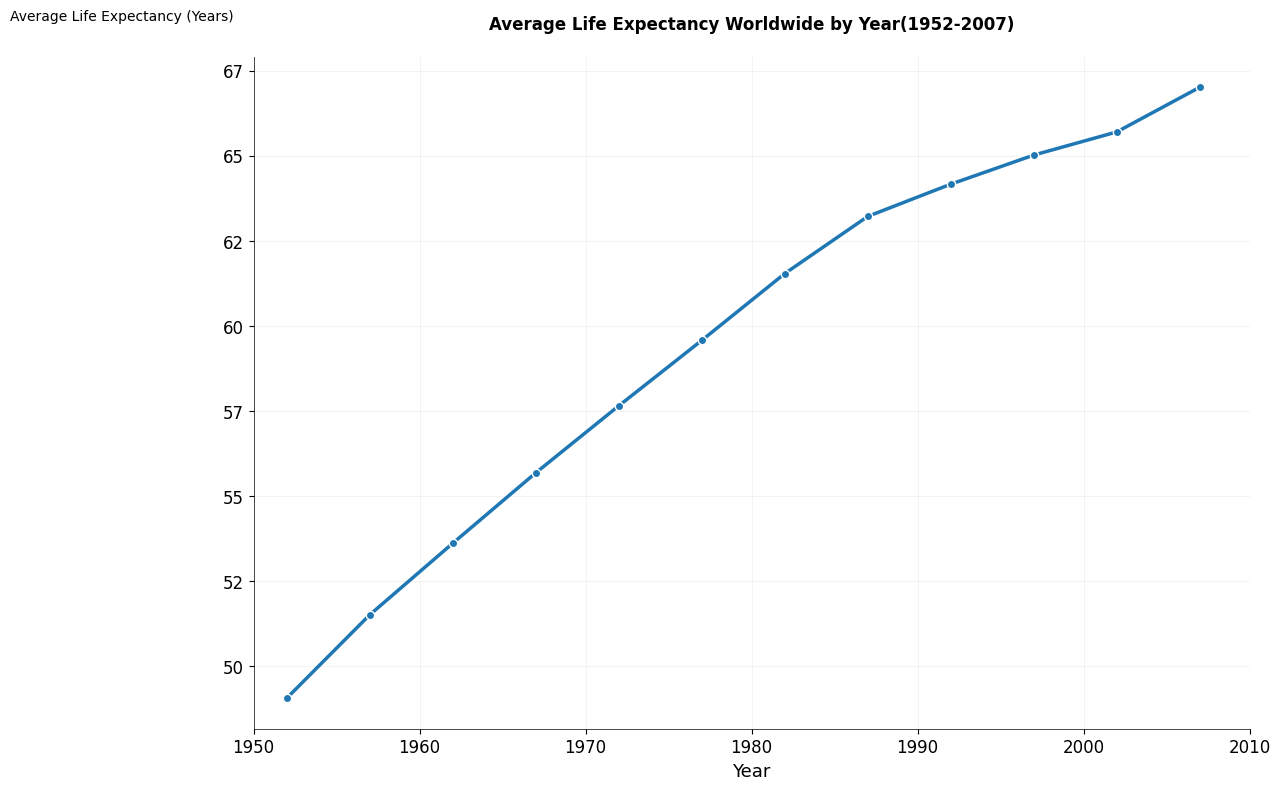

In [6]:
plt.style.use('default')
sns.set_palette("colorblind")

avg_life_exp_by_year = df.groupby('year')['lifeExp'].mean().reset_index()
avg_life_exp_by_year = avg_life_exp_by_year.sort_values('year')

fig, ax = plt.subplots(figsize=(12, 8))

line_color = '#1f77b4'
ax.plot(avg_life_exp_by_year['year'], 
        avg_life_exp_by_year['lifeExp'], 
        color=line_color, 
        linewidth=2.5, 
        marker='o', 
        markersize=6, 
        markerfacecolor=line_color, 
        markeredgecolor='white',
        markeredgewidth=1)

ax.set_xlabel('Year', fontsize=13)
ax.text(-0.02, 1.05, 'Average Life Expectancy (Years)', fontsize=10, 
        rotation=0, transform=ax.transAxes, ha='right', va='bottom')
ax.set_title('Average Life Expectancy Worldwide by Year(1952-2007)', 
             fontsize=12, fontweight='bold', pad=20)

ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', rotation=0, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.grid(True, linestyle='-', alpha=0.2, linewidth=0.5)
ax.set_axisbelow(True)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))

ax.set_xlim(1950, 2010)
ax.set_xticks(range(1950, 2011, 10))

y_range = avg_life_exp_by_year['lifeExp'].max() - avg_life_exp_by_year['lifeExp'].min()
ax.set_ylim(avg_life_exp_by_year['lifeExp'].min() - y_range * 0.05,
            avg_life_exp_by_year['lifeExp'].max() + y_range * 0.05)

plt.subplots_adjust(left=0.12, right=0.95, bottom=0.08, top=0.92)
plt.show()

**2 Questions**

**1) Has Life expectancy been increasing for all continents?**

**2) Is the increasing pattern of life expectancy the same between countries of high and low GDP?**


### 2A- Plot. (18 pts) 
1) Filter the data to just the United States and United Kingdom. 

2) Create a line plot that shows life expectancy over time (using the full time range in the data set).

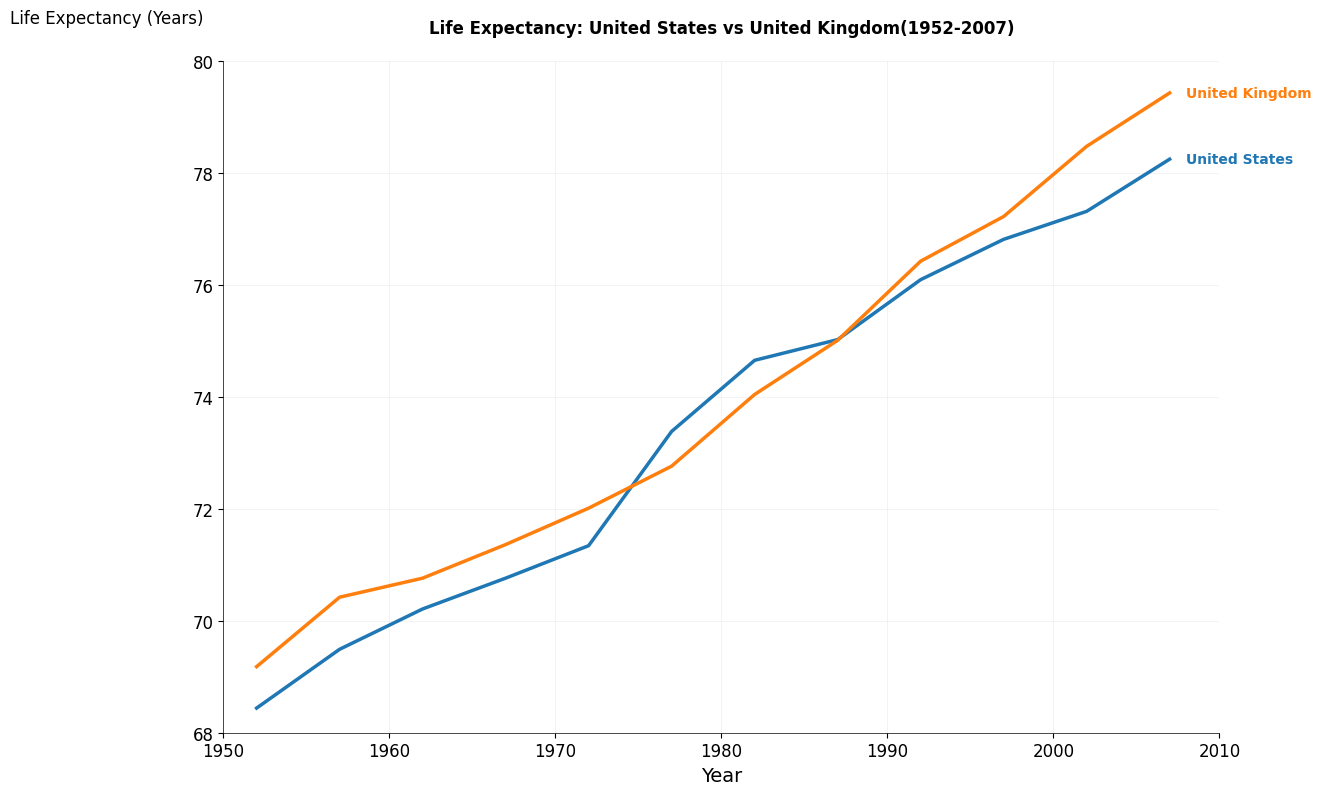

In [56]:
plt.style.use('default')
sns.set_palette("colorblind")

us_data = df[df['country'] == 'United States'].sort_values('year')
uk_data = df[df['country'] == 'United Kingdom'].sort_values('year')

fig, ax = plt.subplots(figsize=(12, 8))

us_color = '#1f77b4'
uk_color = '#ff7f0e'

ax.plot(us_data['year'], 
        us_data['lifeExp'], 
        color=us_color, 
        linewidth=2.5)

ax.plot(uk_data['year'], 
        uk_data['lifeExp'], 
        color=uk_color, 
        linewidth=2.5)

ax.text(us_data['year'].iloc[-1] + 1, us_data['lifeExp'].iloc[-1], 'United States', 
        fontsize=10, va='center', ha='left', color=us_color, fontweight='bold')

ax.text(uk_data['year'].iloc[-1] + 1, uk_data['lifeExp'].iloc[-1], 'United Kingdom', 
        fontsize=10, va='center', ha='left', color=uk_color, fontweight='bold')

ax.set_xlabel('Year', fontsize=14)
ax.text(-0.02, 1.05, 'Life Expectancy (Years)', fontsize=12, 
        rotation=0, transform=ax.transAxes, ha='right', va='bottom')
ax.set_title('Life Expectancy: United States vs United Kingdom(1952-2007)', 
             fontsize=12, fontweight='bold', pad=20)

ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', rotation=0, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.grid(True, linestyle='-', alpha=0.2, linewidth=0.5)
ax.set_axisbelow(True)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))

ax.set_xlim(1950, 2010)
ax.set_xticks(range(1950, 2011, 10))
ax.set_ylim(68, 80),

plt.subplots_adjust(left=0.12, right=0.95, bottom=0.08, top=0.92)
plt.show()

### 2B- Questions (5 pts) 
**- Did you use the default y-axis scale limits, or did you manually set them? (e.g., Did you change the minimum or maximum values on the y-axis?)**

**Response:** I changed the y axis and x axis limits in the chart to minimumm and maximum life expectancies more aligned with the life expectancy results of the US and UK. 


**- If you changed the y-axis limits, how did you decide what scale to use? If you kept the defaults, how does your plotting library determine those default axis limits?**

**Response:** After seeing the results at first I chose for my x axis a scale of a couple of years befofe and after my data range for years(1950-2010) given years went from 1952 to 2010. For the y axis, I followed the same methdology and chose my upper and lower limits plus and minus a couple of years - this made my axis  better aligned with the data I was actually observing for the US and UK.     

**- What is one potential advantage and one potential disadvantage of the y-axis scale you used (whether default or custom)?**

**Response:** An advantage of manually setting my data range is that it makes my overall chart more legible and easier to read. I am able to easily see what my data range is and set my chart to represent that range approriately while excluding any information that might appear outside that range I deem as most representative of my data. A disadvantage is that if I want to alter my chart during exploratory data analysis, such as "changing countries" -- that would mean I would have to change my range manually every time for that line chart for new countries I select. 

### 3- Plot. (18 pts) 
Recreate the line plot showing life expectancy over time for the United States and the United Kingdom. This time, also include data for all other European and North American countries to provide context for the trends in the U.S. and U.K. Design your plot so that the U.S. and U.K. remain the clear focus, and the added context supports rather than distracts from that focus.

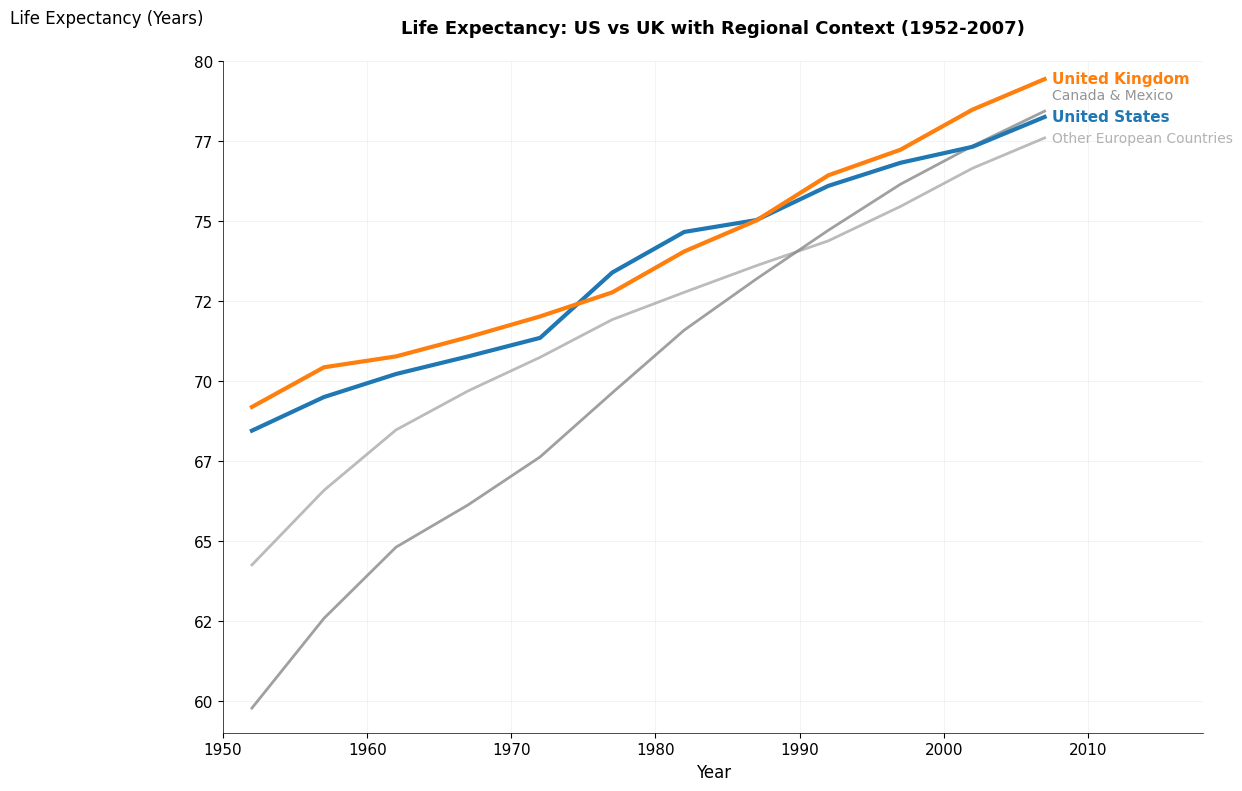

In [52]:
plt.style.use('default')
sns.set_palette("colorblind")

us_data = df[df['country'] == 'United States'].sort_values('year')
uk_data = df[df['country'] == 'United Kingdom'].sort_values('year')

europe_avg = df[(df['continent'] == 'Europe') & (df['country'] != 'United Kingdom')].groupby('year')['lifeExp'].mean().reset_index()
north_america_avg = df[df['country'].isin(['Canada', 'Mexico'])].groupby('year')['lifeExp'].mean().reset_index()

fig, ax = plt.subplots(figsize=(14, 8))

us_color = '#1f77b4'
uk_color = '#ff7f0e'
europe_color = '#aaaaaa'
north_america_color = '#888888'

ax.plot(europe_avg['year'], 
        europe_avg['lifeExp'], 
        color=europe_color, 
        linewidth=2.0,
        alpha=0.8,
        label='Other European Countries (Average)')

ax.plot(north_america_avg['year'], 
        north_america_avg['lifeExp'], 
        color=north_america_color, 
        linewidth=2.0,
        alpha=0.8,
        label='Canada & Mexico (Average)')

ax.plot(us_data['year'], 
        us_data['lifeExp'], 
        color=us_color, 
        linewidth=3.0,
        label='United States')

ax.plot(uk_data['year'], 
        uk_data['lifeExp'], 
        color=uk_color, 
        linewidth=3.0,
        label='United Kingdom')

ax.text(us_data['year'].iloc[-1] + 0.5, 
        us_data['lifeExp'].iloc[-1], 
        'United States', 
        fontsize=11, 
        va='center', 
        ha='left', 
        color=us_color, 
        fontweight='bold')

ax.text(uk_data['year'].iloc[-1] + 0.5, 
        uk_data['lifeExp'].iloc[-1], 
        'United Kingdom', 
        fontsize=11, 
        va='center', 
        ha='left', 
        color=uk_color, 
        fontweight='bold')

ax.text(europe_avg['year'].iloc[-1] + 0.5, 
        europe_avg['lifeExp'].iloc[-1], 
        'Other European Countries', 
        fontsize=10, 
        va='center', 
        ha='left', 
        color=europe_color, 
        alpha=0.9)

ax.text(north_america_avg['year'].iloc[-1] + 0.5, 
        north_america_avg['lifeExp'].iloc[-1] + 0.5, 
        'Canada & Mexico', 
        fontsize=10, 
        va='center', 
        ha='left', 
        color=north_america_color, 
        alpha=0.9)

ax.set_xlabel('Year', fontsize=12)
ax.text(-0.02, 1.05, 'Life Expectancy (Years)', fontsize=12, 
        rotation=0, transform=ax.transAxes, ha='right', va='bottom')
ax.set_title('Life Expectancy: US vs UK with Regional Context (1952-2007)', 
             fontsize=13, fontweight='bold', pad=20)

ax.tick_params(axis='x', rotation=0, labelsize=11)
ax.tick_params(axis='y', rotation=0, labelsize=11)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.grid(True, linestyle='-', alpha=0.2, linewidth=0.5)
ax.set_axisbelow(True)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))

ax.set_xlim(1950, 2018)
ax.set_xticks(range(1950, 2011, 10))
ax.set_ylim(59, 80)

plt.subplots_adjust(left=0.10, right=0.80, bottom=0.08, top=0.92)
plt.show()

# 4 - Plot. (18 pts)
Create a figure that effectively and efficiently represents the following title and subtitle (note
that the data only goes through 2007, so we will pretend like 2007 is the current year):
Title: “The current Life Expectancy Gap for the U.S. compared to U.K. is the largest ever
recorded”
Subtitle: “With the exception of a period in the 1970-80s, life expectancy has been consistently
lower for the U.S. than the U.K.”


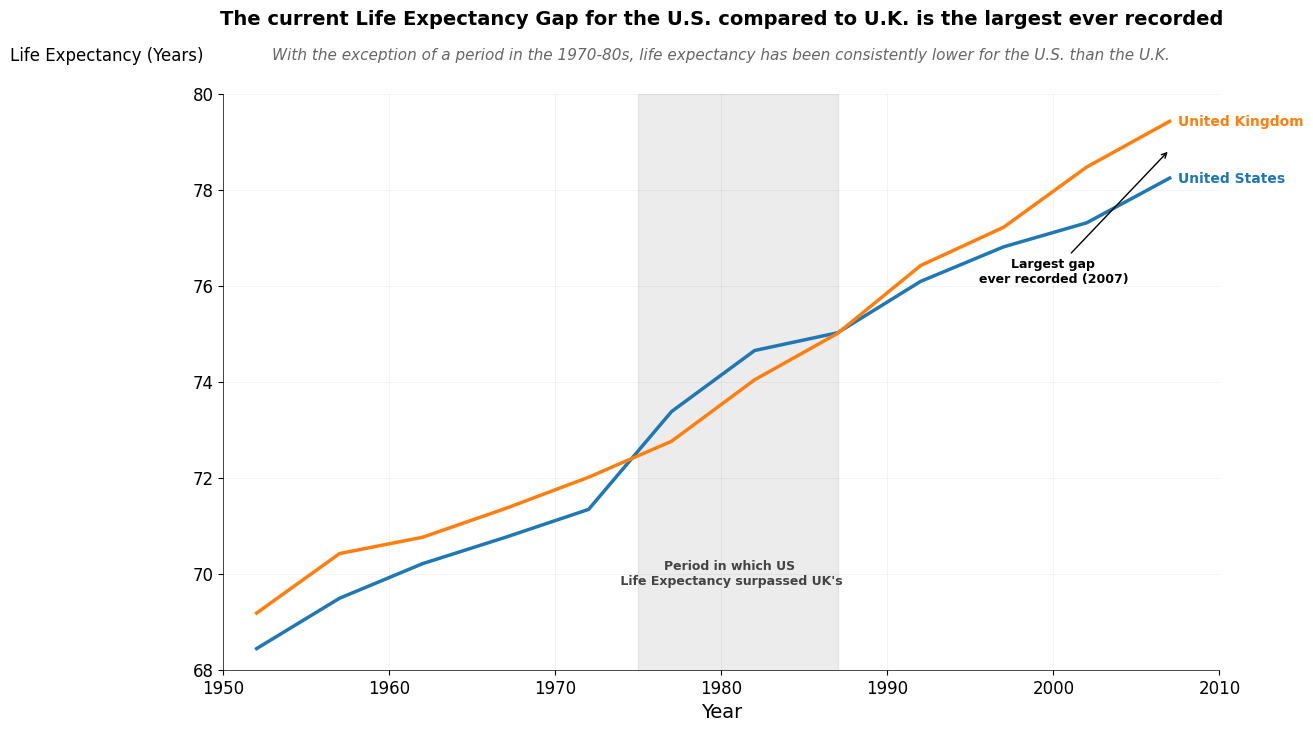

In [61]:
plt.style.use('default')
sns.set_palette("colorblind")

us_data = df[df['country'] == 'United States'].sort_values('year')
uk_data = df[df['country'] == 'United Kingdom'].sort_values('year')

fig, ax = plt.subplots(figsize=(12, 8))

us_color = '#1f77b4'
uk_color = '#ff7f0e'

ax.axvspan(1975, 1987, alpha=0.15, color='gray')

ax.text(1980.5, 70, 'Period in which US\n Life Expectancy surpassed UK\'s', 
        fontsize=9, ha='center', va='center', color='#444444', fontweight='bold')

ax.plot(us_data['year'], 
        us_data['lifeExp'], 
        color=us_color, 
        linewidth=2.5)

ax.plot(uk_data['year'], 
        uk_data['lifeExp'], 
        color=uk_color, 
        linewidth=2.5)

us_2007 = us_data[us_data['year'] == 2007]['lifeExp'].iloc[0]
uk_2007 = uk_data[uk_data['year'] == 2007]['lifeExp'].iloc[0]
gap_midpoint = (us_2007 + uk_2007) / 2

ax.annotate('Largest gap\never recorded (2007)', 
            xy=(2007, gap_midpoint), xytext=(2000, 76),
            arrowprops=dict(arrowstyle='->', color='black', lw=1.0),
            fontsize=9, ha='center', va='bottom', fontweight='bold')

ax.text(us_data['year'].iloc[-1] + 0.5, us_data['lifeExp'].iloc[-1], 'United States', 
        fontsize=10, va='center', ha='left', color=us_color, fontweight='bold')

ax.text(uk_data['year'].iloc[-1] + 0.5, uk_data['lifeExp'].iloc[-1], 'United Kingdom', 
        fontsize=10, va='center', ha='left', color=uk_color, fontweight='bold')

ax.set_xlabel('Year', fontsize=14)
ax.text(-0.02, 1.05, 'Life Expectancy (Years)', fontsize=12, 
        rotation=0, transform=ax.transAxes, ha='right', va='bottom')

ax.text(0.5, 1.12, 'The current Life Expectancy Gap for the U.S. compared to U.K. is the largest ever recorded', 
        fontsize=14, fontweight='bold', ha='center', transform=ax.transAxes)
ax.text(0.5, 1.06, 'With the exception of a period in the 1970-80s, life expectancy has been consistently lower for the U.S. than the U.K.', 
        fontsize=11, ha='center', transform=ax.transAxes, style='italic', color='#666666')

ax.tick_params(axis='x', rotation=0, labelsize=12)
ax.tick_params(axis='y', rotation=0, labelsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_linewidth(0.5)
ax.spines['bottom'].set_linewidth(0.5)

ax.grid(True, linestyle='-', alpha=0.2, linewidth=0.5)
ax.set_axisbelow(True)

ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{int(x)}'))

ax.set_xlim(1950, 2010)
ax.set_xticks(range(1950, 2011, 10))
ax.set_ylim(68, 80)

plt.subplots_adjust(left=0.12, right=0.95, bottom=0.08, top=0.80)
plt.show()

# PART II: Traffic on NC 147

### Data Load

In [63]:
import pandas as pd
from datetime import datetime


dat = pd.read_csv("data/HourlyDataByDirection_raw.csv",
parse_dates=['DATE'],
date_format='%m/%d/%y')

dat['datetime'] = pd.to_datetime(
dat['DATE'].astype(str) + ' ' + dat['TIME'].astype(str)
)
print(dat.head())

C:\Users\chris\AppData\Local\Temp\ipykernel_49680\71216131.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dat['datetime'] = pd.to_datetime(


    LOCAL ID DIRECTION  MONTH  DOW       DATE      TIME  VOLUME  \
0  320000009        EB      1    2 2024-01-01  12:00 AM     730   
1  320000009        EB      1    2 2024-01-01   1:00 AM     664   
2  320000009        EB      1    2 2024-01-01   2:00 AM     487   
3  320000009        EB      1    2 2024-01-01   3:00 AM     380   
4  320000009        EB      1    2 2024-01-01   4:00 AM     330   

             datetime  
0 2024-01-01 00:00:00  
1 2024-01-01 01:00:00  
2 2024-01-01 02:00:00  
3 2024-01-01 03:00:00  
4 2024-01-01 04:00:00  


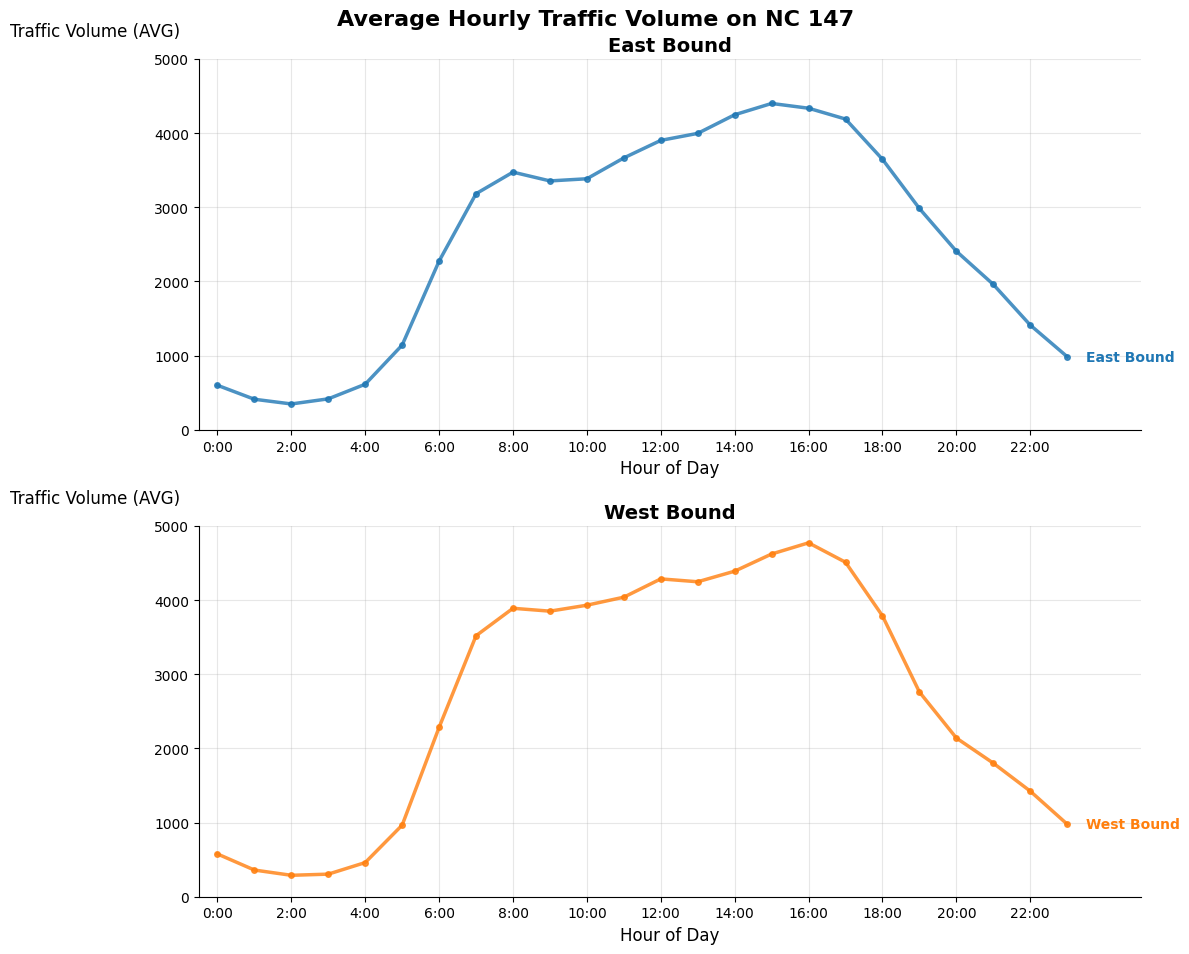

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('default')
sns.set_palette("colorblind")

dat['hour'] = dat['datetime'].dt.hour
hourly_avg = dat.groupby(['DIRECTION', 'hour'])['VOLUME'].mean().reset_index()

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

eb_data = hourly_avg[hourly_avg['DIRECTION'] == 'EB'].sort_values('hour')
wb_data = hourly_avg[hourly_avg['DIRECTION'] == 'WB'].sort_values('hour')

eb_color = '#1f77b4'
wb_color = '#ff7f0e'

axes[0].plot(eb_data['hour'], eb_data['VOLUME'], 
            color=eb_color, linewidth=2.5, marker='o', markersize=4, alpha=0.8)

axes[0].text(eb_data['hour'].iloc[-1] + 0.5, eb_data['VOLUME'].iloc[-1], 'East Bound', 
            fontsize=10, ha='left', va='center', color=eb_color, fontweight='bold')

axes[0].text(-0.02, 1.05, 'Traffic Volume (AVG)', fontsize=12, 
            rotation=0, transform=axes[0].transAxes, ha='right', va='bottom')

axes[0].set_xticks(range(0, 24, 2))
axes[0].set_xticklabels([f'{h}:00' for h in range(0, 24, 2)])
axes[0].tick_params(axis='x', rotation=0, labelsize=10)
axes[0].tick_params(axis='y', rotation=0, labelsize=10)

axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)

axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(-0.5, 25)
axes[0].set_ylim(0, 5000)
axes[0].set_title('East Bound', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Hour of Day', fontsize=12)

axes[1].plot(wb_data['hour'], wb_data['VOLUME'], 
            color=wb_color, linewidth=2.5, marker='o', markersize=4, alpha=0.8)

axes[1].text(wb_data['hour'].iloc[-1] + 0.5, wb_data['VOLUME'].iloc[-1], 'West Bound', 
            fontsize=10, ha='left', va='center', color=wb_color, fontweight='bold')

axes[1].set_xlabel('Hour of Day', fontsize=12)
axes[1].text(-0.02, 1.05, 'Traffic Volume (AVG)', fontsize=12, 
            rotation=0, transform=axes[1].transAxes, ha='right', va='bottom')

axes[1].set_xticks(range(0, 24, 2))
axes[1].set_xticklabels([f'{h}:00' for h in range(0, 24, 2)])
axes[1].tick_params(axis='x', rotation=0, labelsize=10)
axes[1].tick_params(axis='y', rotation=0, labelsize=10)

axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)

axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(-0.5, 25)
axes[1].set_ylim(0, 5000)
axes[1].set_title('West Bound', fontsize=14, fontweight='bold')

fig.suptitle('Average Hourly Traffic Volume on NC 147', 
             fontsize=16, fontweight='bold', y=0.95)

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

# 1B. Answer the following (5 pts)
What insights can you get from these initial plots? In what ways does this plot mask patterns
in the data?

**Response** I first had a plot with hourly data over the entire time series, day over day for the few months represented in the data. That chart looked solely like a random walk, which had no insights into it. That led me to get avreage hourly traffic for my dataset which unleashed patterns that are substantially more useful. The following patters emerged from my average volume by hour of the day chart:
1) It shows on both East and Westbound trffic is minimized between hours 11pm(23:00) and 5am(05:00). The traffic stays quite high torughout the day both ways, generally peaking around 3-4pm(15:00 - 16:00). 
2) The traffic on both West and Eastbound have a similar range, possessing average hourly volume 400-4500 traffic volume units.
3) On both Directions, traffic tends to increase the most between hours 4:00 - 7:00 while decreasing the most between hours 17:00 - 23:00.